In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from data_gen import get_agent_distribution_and_losses_nels, generate_losses, get_types_and_noise, get_types_loss_and_noise, generate_covariates
from utils import compute_continuity_noise
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
np.random.seed(0)
d=9
prev_beta = np.ones(d)/np.sqrt(d)

In [9]:
agent_dist, all_types_and_losses, all_labels, rep_losses, sigma = get_agent_distribution_and_losses_nels(n=1000000,
                                                                                              prev_beta=prev_beta, 
                                                                                              n_clusters=8, 
                                                                                              seed=0)

In [12]:
sample_idx = np.random.choice(list(range(len(all_types_and_losses))), 1000)
sample_types = all_types_and_losses[sample_idx]
sample_labels = all_labels[sample_idx]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sample_types)

Text(0.5, 1.0, '2D-Visualization of Agent Types')

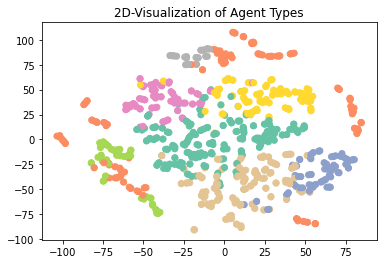

In [13]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=sample_labels, cmap="Set2")
plt.title("2D-Visualization of Agent Types")
#plt.savefig("figs/agent_type_clusters.pdf")

In [14]:
rep_losses

array([[[-0.68831858]],

       [[-0.6756847 ]],

       [[-0.84623827]],

       [[-0.6500696 ]],

       [[-0.65272624]],

       [[-0.64212909]],

       [[-0.78706802]],

       [[-0.80760153]]])

In [15]:
agent_dist.types

{'etas': array([[[4.86603942],
         [4.83613922],
         [4.86312228],
         [4.92088075],
         [4.85346607],
         [4.25472114],
         [4.48040077],
         [4.90691183],
         [5.07257976]],
 
        [[9.92646413],
         [9.94427882],
         [9.98402597],
         [9.97396476],
         [4.87134644],
         [4.40172156],
         [4.57148031],
         [4.89134417],
         [5.16867653]],
 
        [[6.01802852],
         [6.25405648],
         [6.05099656],
         [6.06496527],
         [8.07317197],
         [7.86411737],
         [8.03940033],
         [8.29335616],
         [8.31262495]],
 
        [[4.73201852],
         [4.58354226],
         [4.74070398],
         [4.81122401],
         [3.20754197],
         [2.75272004],
         [2.89881921],
         [3.27861025],
         [1.65513723]],
 
        [[9.95657428],
         [9.96894731],
         [9.98248846],
         [9.97820475],
         [2.1178933 ],
         [2.14552029],
         [1.89

In [8]:
rep_losses[agent_dist.n_agent_types].reshape(agent_dist.n, 1)

array([[-0.82992353],
       [-0.65099187],
       [-0.82992353],
       ...,
       [-0.70431842],
       [-0.82992353],
       [-0.64455978]])

In [7]:
def loss_beta(agent_dist, indices, beta, sigma, q):
    s_beta = agent_dist.quantile_fixed_point_true_distribution(beta, sigma, q)
    br_noisy_scores = agent_dist.best_response_noisy_score_distribution(beta, s_beta, sigma)
    rejected = br_noisy_scores < np.quantile(br_noisy_scores, q)
    type_losses, stu_id = generate_losses()
    losses = type_losses[agent_dist.n_agent_types]
    losses[rejected] = 0.
    return np.sum(losses)/len(losses)

In [10]:
losses, stu_id1 = generate_losses()

In [11]:
X, socio_econ, stu_id2= generate_covariates()

In [16]:
losses.shape

(14915, 1, 1)

In [13]:
stu_id1

array([ 124902,  124915,  124916, ..., 9199157, 9199179, 9199197])

In [14]:
stu_id2

array([[ 124902],
       [ 124915],
       [ 124916],
       ...,
       [9199157],
       [9199179],
       [9199197]])

In [8]:
all_losses = []

for i in tqdm(range(100)):
    addend = np.zeros(prev_beta.shape)
    addend[0] += i * 0.05
    beta = prev_beta + addend
    beta /= np.sqrt(np.sum(beta ** 2))
    all_losses.append(loss_beta(agent_dist, indices, beta=beta, sigma=0.4, q=0.7))

  0%|                                                   | 0/100 [00:00<?, ?it/s]


NameError: name 'indices' is not defined

In [ ]:
plt.plot(list(range(100)), all_losses)